# Objective

**To study individual's health data and build a model to predict whether they will get heart disease or not.**

In [1]:
#import the heart disease patient data file using pandas, creating a header row
#since file doesn't have column names
import pandas as pd
header_row = ['age','sex','pain','BP','chol','fbs','ecg','maxhr','eiang','eist','slope','vessels','thal','diagnosis']
heart = pd.read_csv(r"C:\Users\user\Desktop\Introtallent\Python\data\Heart Disease Data.txt", names=header_row)

In [2]:
heart

,age,sex,pain,BP,chol,fbs,ecg,maxhr,eiang,eist,slope,vessels,thal,diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
#for data sampling
from sklearn.model_selection import train_test_split
#for model building
from sklearn.linear_model import LogisticRegression
#for confusion matrix, accuracy, precision, and recall
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [4]:
heart.dtypes

age          float64
sex          float64
pain         float64
BP           float64
chol         float64
fbs          float64
ecg          float64
maxhr        float64
eiang        float64
eist         float64
slope        float64
vessels       object
thal          object
diagnosis      int64
dtype: object

In [5]:
heart['diagnosis']=heart['diagnosis'].replace([1,2,3,4,0],[1,1,1,1,0])

In [6]:
heart['diagnosis']

0      0
1      1
2      1
3      0
4      0
      ..
298    1
299    1
300    1
301    1
302    0
Name: diagnosis, Length: 303, dtype: int64

In [7]:
heart['sex']=heart['sex'].replace([1,0],['M','F'])
heart['sex'].dtype

dtype('O')

In [8]:
heart['pain']=heart['pain'].astype('object')

In [9]:
heart['fbs']=heart['fbs'].astype('object')

In [10]:
heart['ecg']=heart['ecg'].astype('object')

In [11]:
heart['eiang']=heart['eiang'].astype('object')

In [12]:
heart['slope']=heart['slope'].astype('object')

In [13]:
heart.dtypes

age          float64
sex           object
pain          object
BP           float64
chol         float64
fbs           object
ecg           object
maxhr        float64
eiang         object
eist         float64
slope         object
vessels       object
thal          object
diagnosis      int64
dtype: object

In [14]:
heart['vessels'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [15]:
heart['vessels']=pd.to_numeric(heart['vessels'],errors='coerce')

In [16]:
heart['vessels']=heart['vessels'].astype('object')
heart['vessels'].unique()

array([0.0, 3.0, 2.0, 1.0, nan], dtype=object)

In [17]:
heart['thal']=pd.to_numeric(heart['thal'],errors='coerce')

In [18]:
heart['thal']=heart['thal'].astype('object')
heart['thal'].unique()

array([6.0, 3.0, 7.0, nan], dtype=object)

In [19]:
#missing value treatment

In [47]:
heart.isnull().sum()

age          0
sex          0
pain         0
BP           0
chol         0
fbs          0
ecg          0
maxhr        0
eiang        0
eist         0
slope        0
vessels      4
thal         2
diagnosis    0
dtype: int64

In [48]:
heart=heart.dropna(axis=0)
heart.shape

(297, 14)

In [49]:
heart.isnull().sum()

age          0
sex          0
pain         0
BP           0
chol         0
fbs          0
ecg          0
maxhr        0
eiang        0
eist         0
slope        0
vessels      0
thal         0
diagnosis    0
dtype: int64

In [50]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    float64
 1   sex        297 non-null    object 
 2   pain       297 non-null    object 
 3   BP         297 non-null    float64
 4   chol       297 non-null    float64
 5   fbs        297 non-null    object 
 6   ecg        297 non-null    object 
 7   maxhr      297 non-null    float64
 8   eiang      297 non-null    object 
 9   eist       297 non-null    float64
 10  slope      297 non-null    object 
 11  vessels    297 non-null    object 
 12  thal       297 non-null    object 
 13  diagnosis  297 non-null    int64  
dtypes: float64(5), int64(1), object(8)
memory usage: 34.8+ KB


## Outlier Treatment

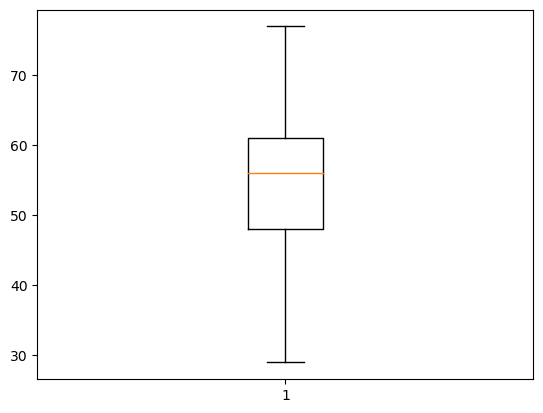

In [51]:
plt.boxplot(heart['age'])
plt.show()

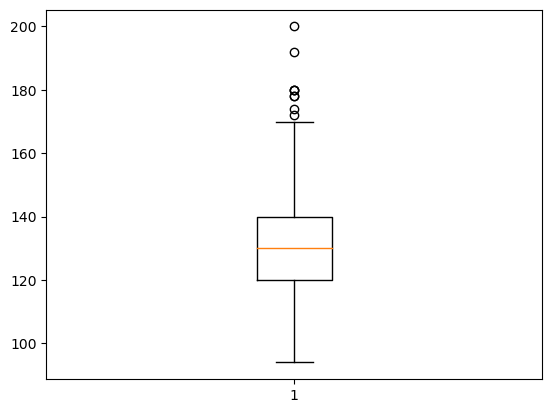

In [52]:
plt.boxplot(heart['BP'])
plt.show()

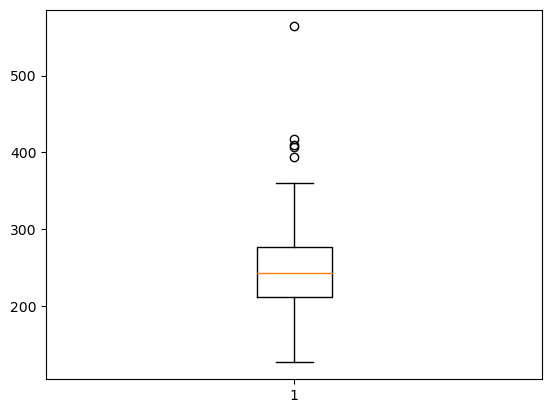

In [53]:
plt.boxplot(heart['chol'])
plt.show()

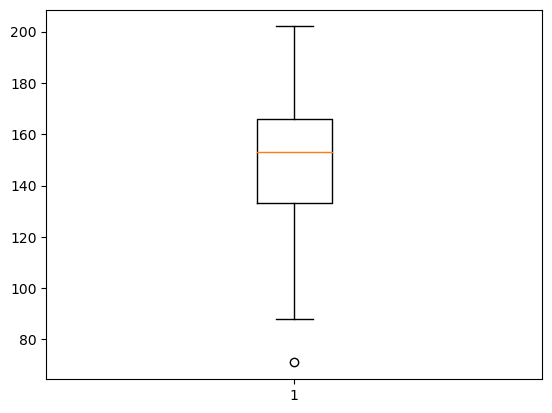

In [54]:
plt.boxplot(heart['maxhr'])
plt.show()

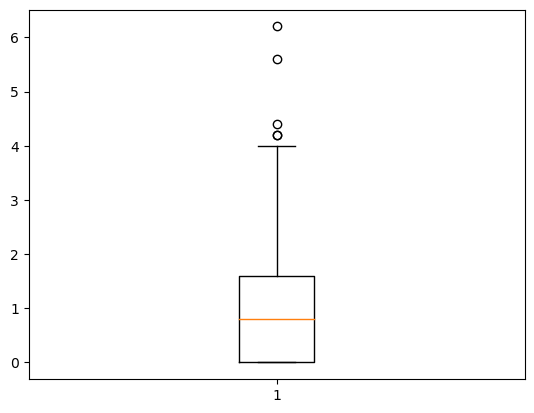

In [55]:
plt.boxplot(heart['eist'])
plt.show()

In [56]:
def remove_outliers(d,c):
    q1=d[c].quantile(0.25)
    q3=d[c].quantile(0.75)
    iqr=q3-q1
    ub=q3+iqr*1.5
    lb=q1-iqr*1.5
    result=d[(d[c]>=lb)&(d[c]<=ub)]
    return result

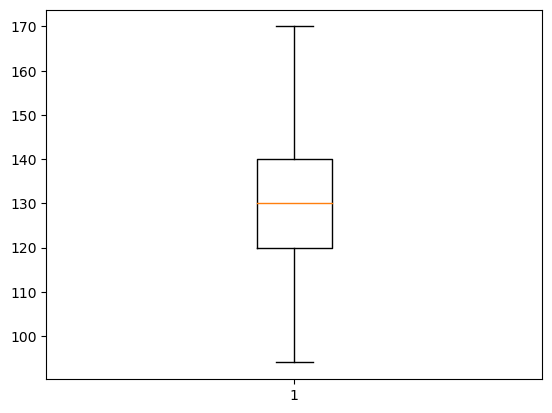

In [57]:
heart=remove_outliers(heart,'BP')
plt.boxplot(heart['BP'])
plt.show()

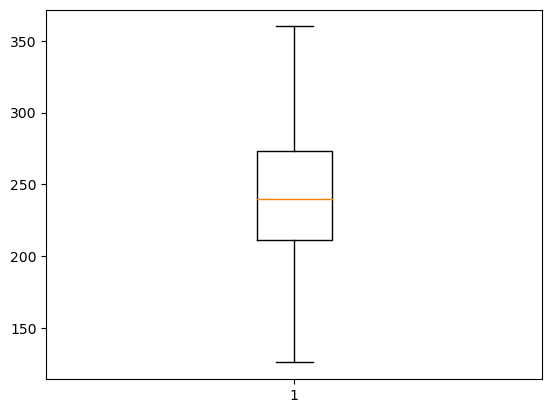

In [58]:
heart=remove_outliers(heart,'chol')
plt.boxplot(heart['chol'])
plt.show()

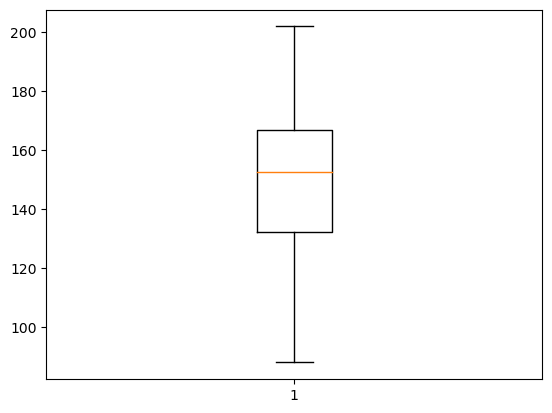

In [59]:
heart=remove_outliers(heart,'maxhr')
plt.boxplot(heart['maxhr'])
plt.show()

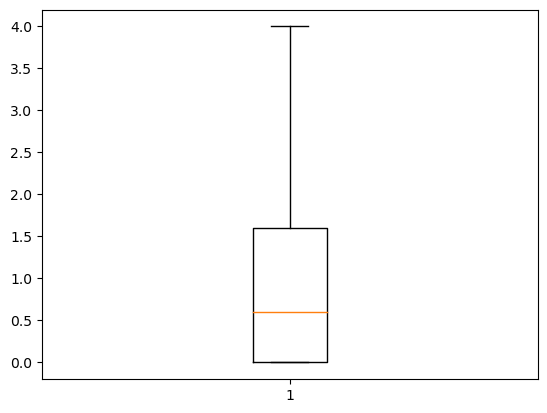

In [60]:
heart=remove_outliers(heart,'eist')
plt.boxplot(heart['eist'])
plt.show()

In [61]:
heart['diagnosis'].unique()

array([0, 1], dtype=int64)

## EDA

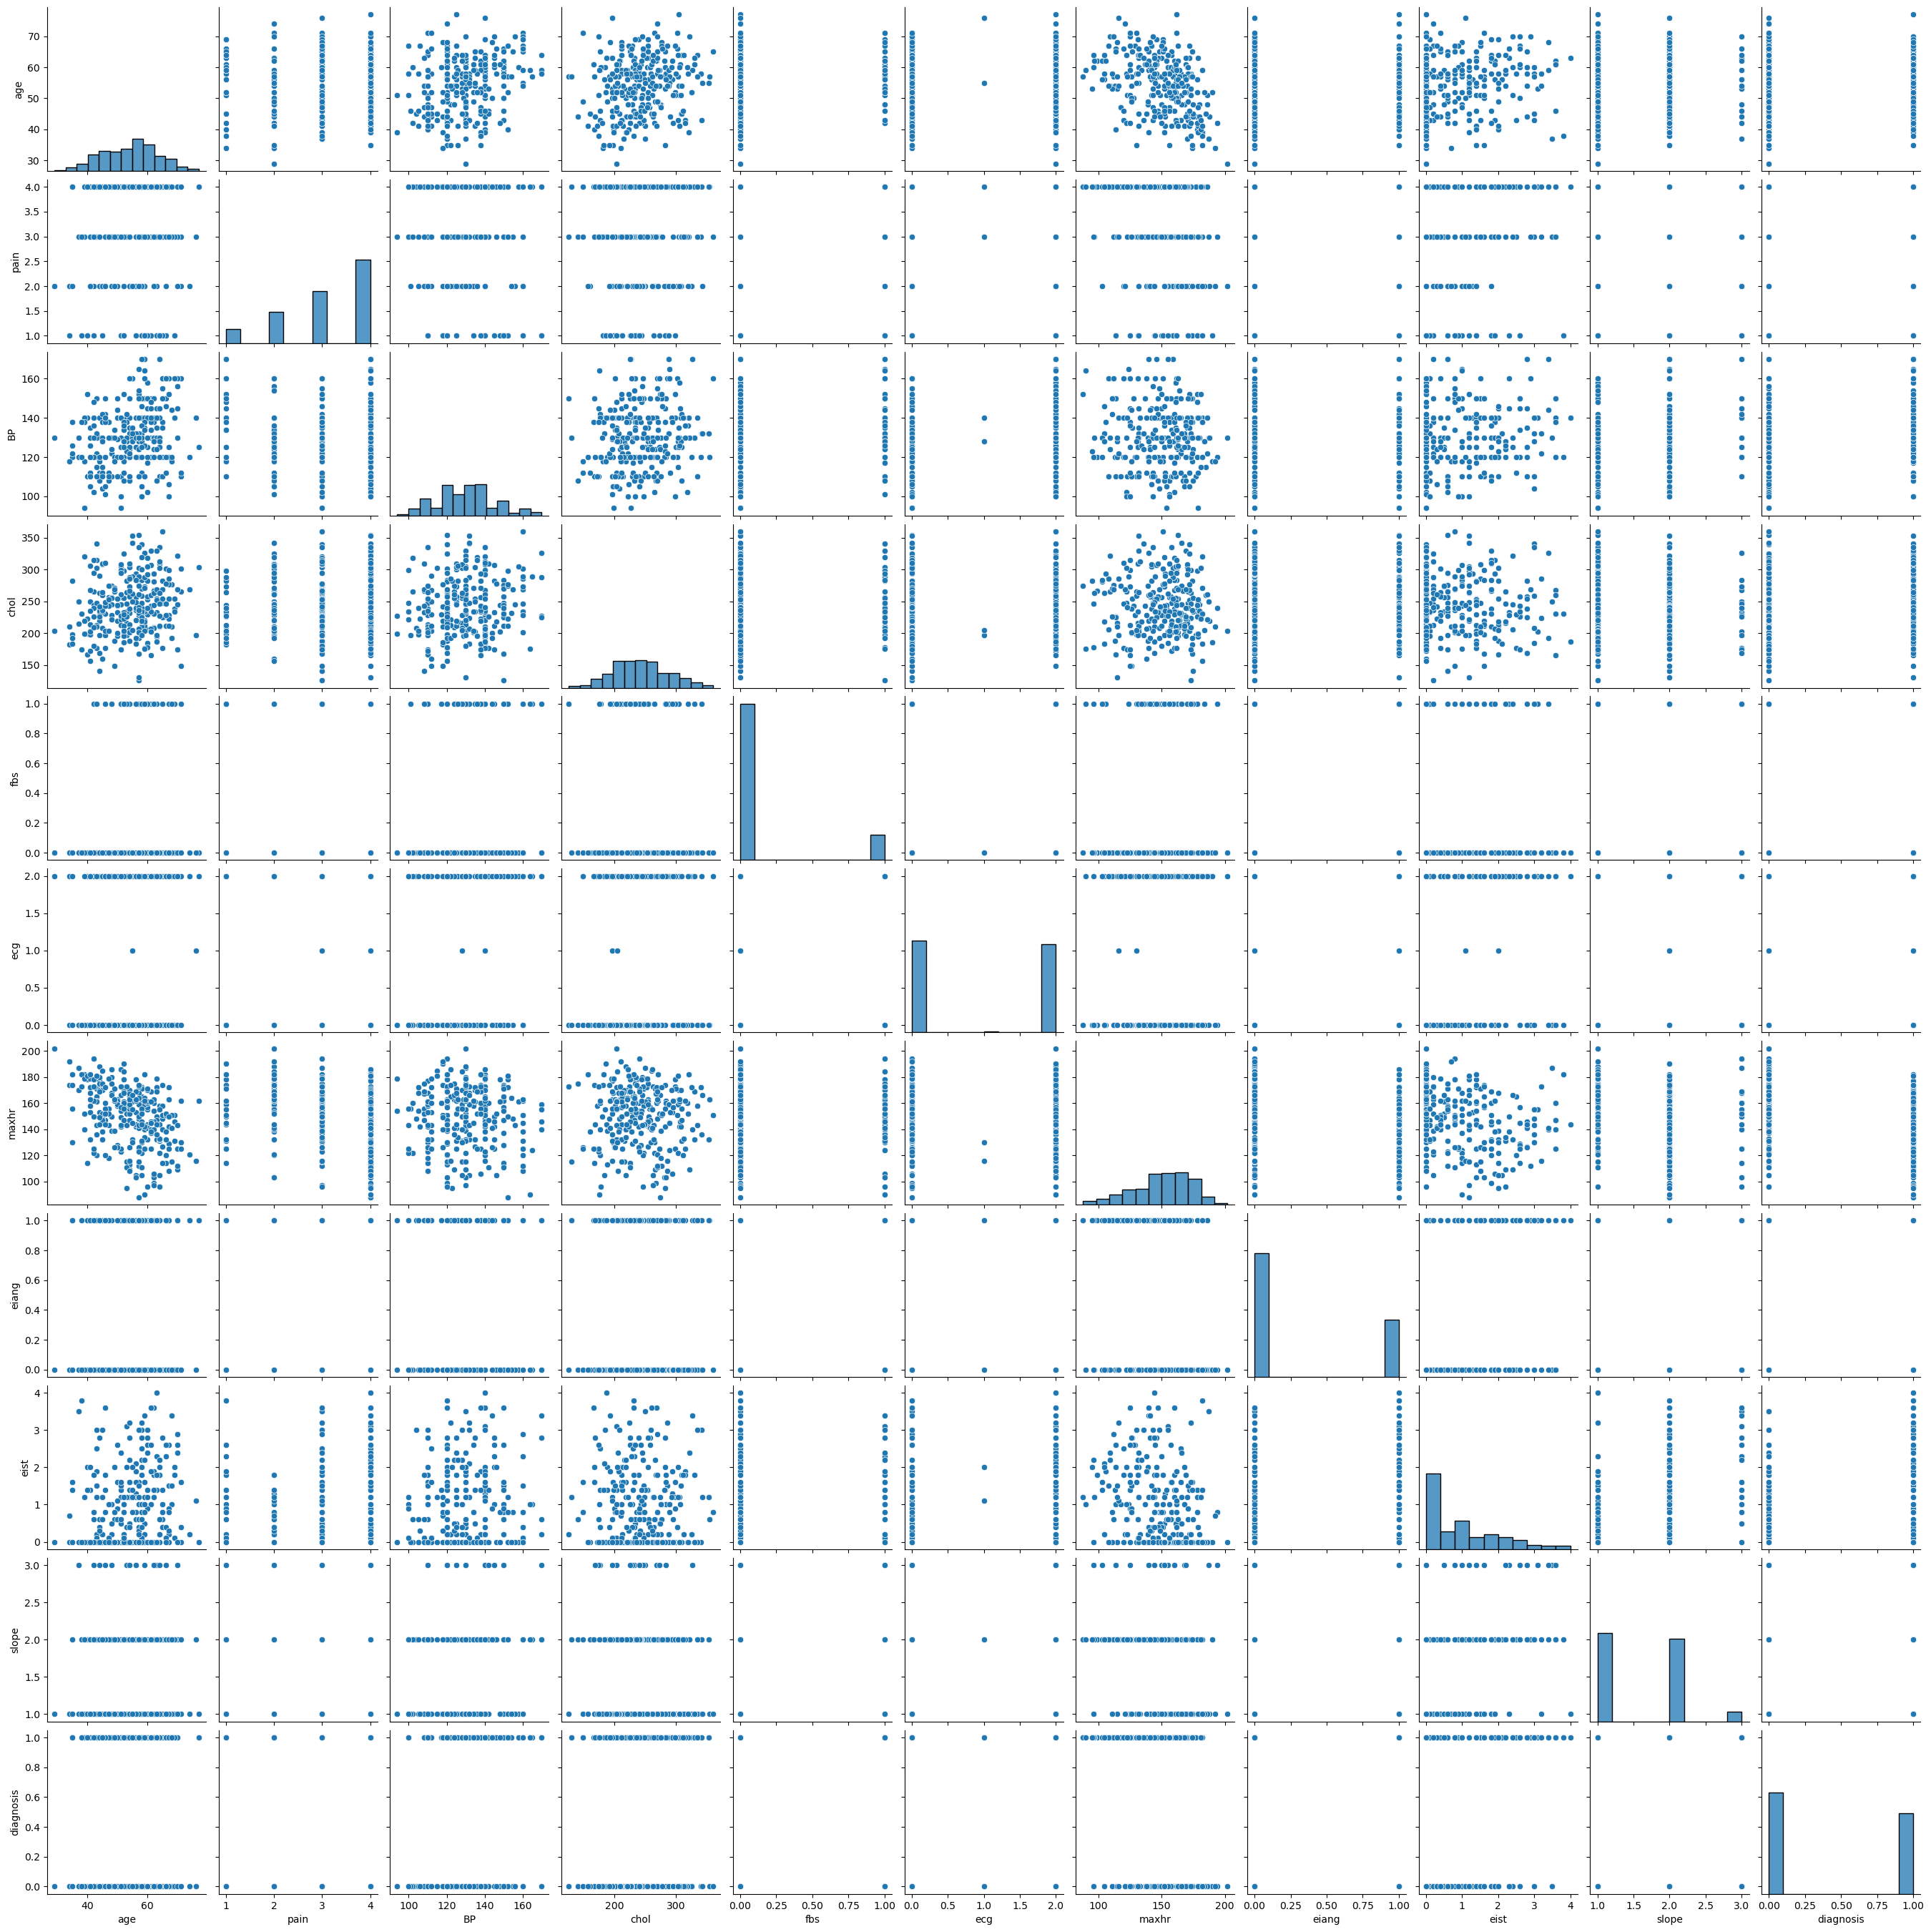

In [72]:
sns.pairplot(heart)

<Axes: xlabel='diagnosis'>

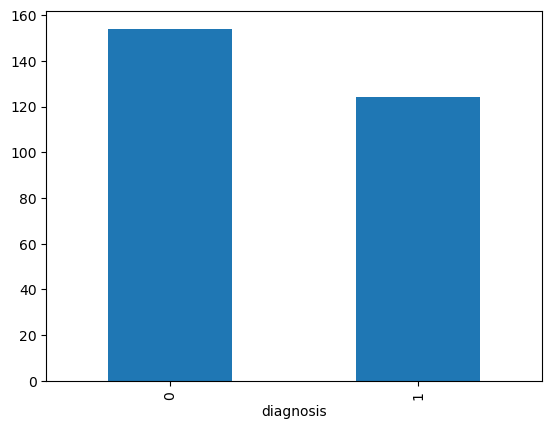

In [62]:
heart.groupby('diagnosis')['diagnosis'].count().plot(kind='bar')

<Axes: xlabel='sex'>

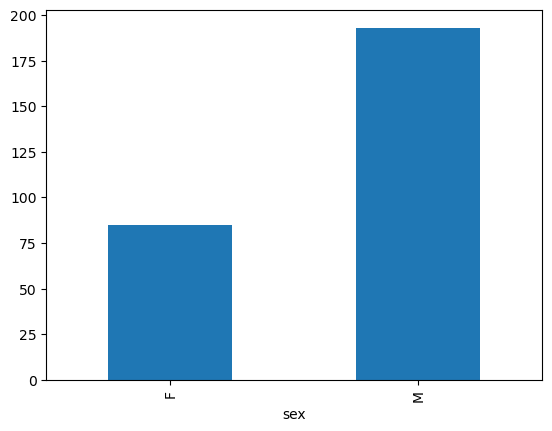

In [63]:
heart.groupby('sex')['sex'].count().plot(kind='bar')

<Axes: xlabel='pain'>

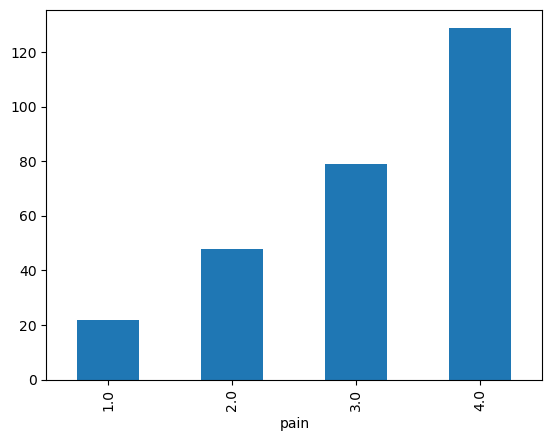

In [64]:
heart.groupby('pain')['pain'].count().plot(kind='bar')

<Axes: xlabel='fbs'>

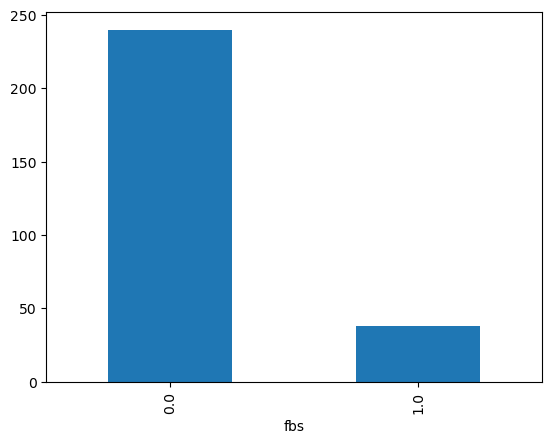

In [65]:
heart.groupby('fbs')['fbs'].count().plot(kind='bar')

<Axes: xlabel='ecg'>

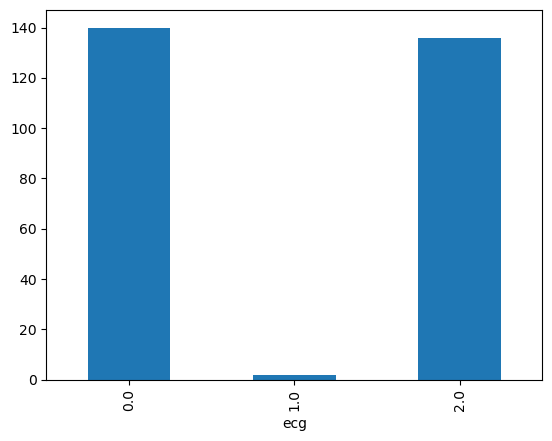

In [66]:
heart.groupby('ecg')['ecg'].count().plot(kind='bar')

<Axes: xlabel='eiang'>

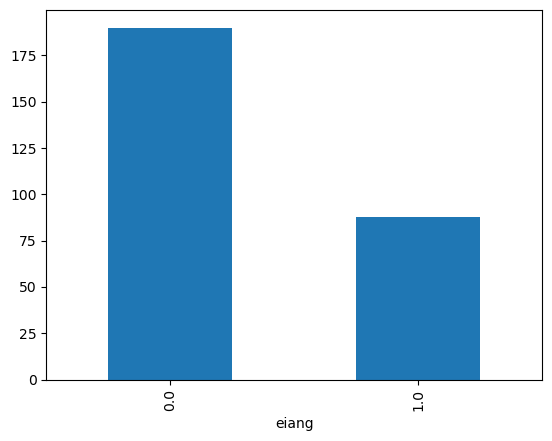

In [67]:
heart.groupby('eiang')['eiang'].count().plot(kind='bar')

<Axes: xlabel='slope'>

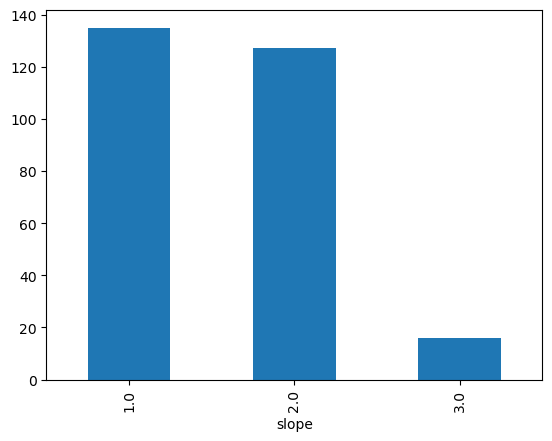

In [68]:
heart.groupby('slope')['slope'].count().plot(kind='bar')

<Axes: xlabel='vessels'>

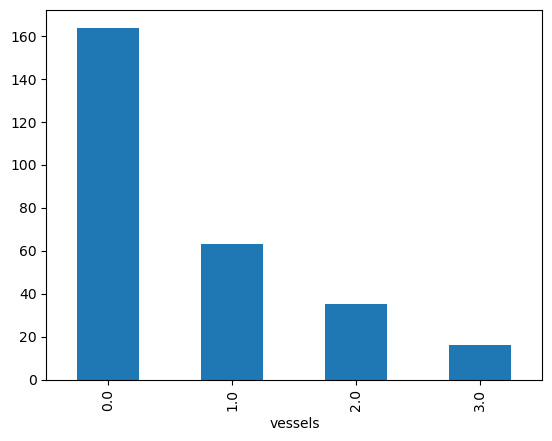

In [69]:
heart.groupby('vessels')['vessels'].count().plot(kind='bar')

<Axes: xlabel='thal'>

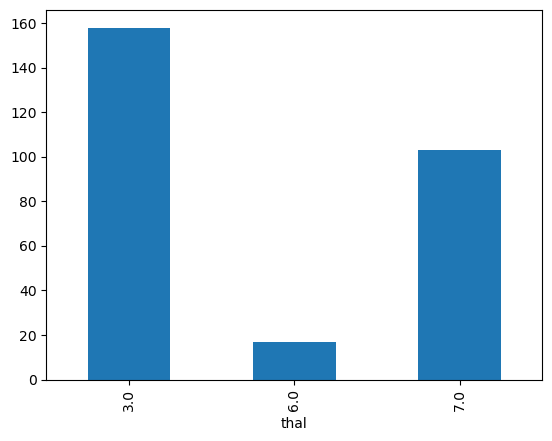

In [70]:
heart.groupby('thal')['thal'].count().plot(kind='bar')

C:\Users\user\AppData\Local\Temp\ipykernel_7900\3901112812.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart['age'])


<Axes: xlabel='age', ylabel='Density'>

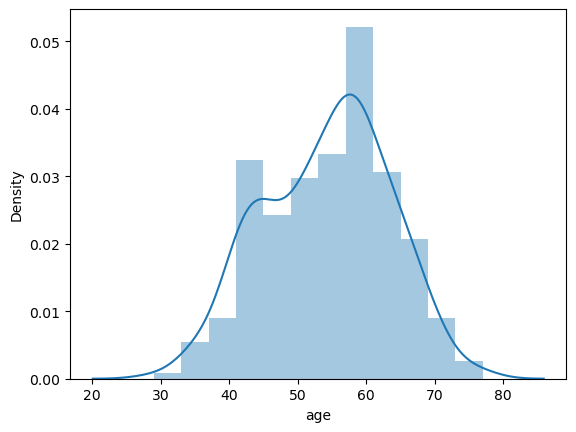

In [71]:
sns.distplot(heart['age'])

C:\Users\user\AppData\Local\Temp\ipykernel_7900\4045176850.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart['BP'])


<Axes: xlabel='BP', ylabel='Density'>

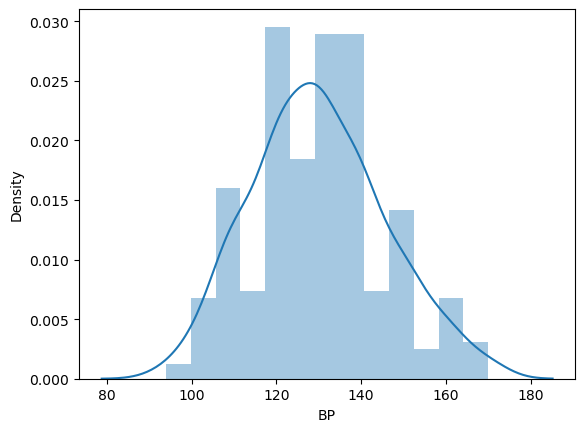

In [72]:
sns.distplot(heart['BP'])

C:\Users\user\AppData\Local\Temp\ipykernel_7900\1127716711.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart['chol'])


<Axes: xlabel='chol', ylabel='Density'>

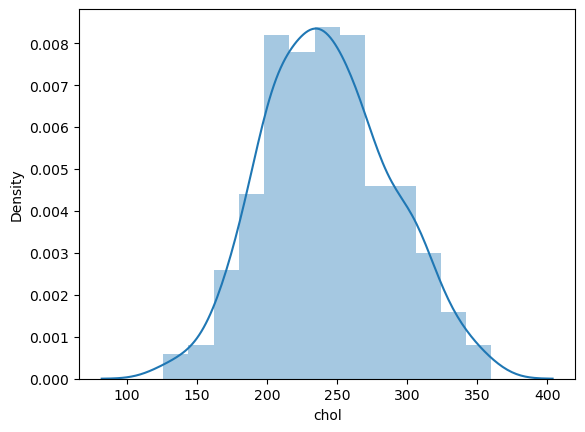

In [73]:
sns.distplot(heart['chol'])

C:\Users\user\AppData\Local\Temp\ipykernel_7900\1596976681.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart['maxhr'])


<Axes: xlabel='maxhr', ylabel='Density'>

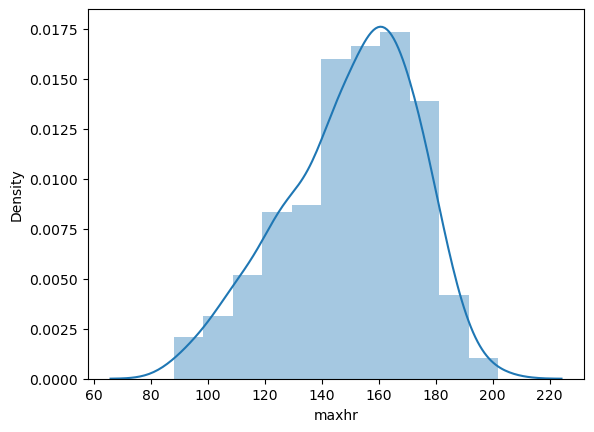

In [74]:
sns.distplot(heart['maxhr'])

C:\Users\user\AppData\Local\Temp\ipykernel_7900\3940355181.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart['eist'])


<Axes: xlabel='eist', ylabel='Density'>

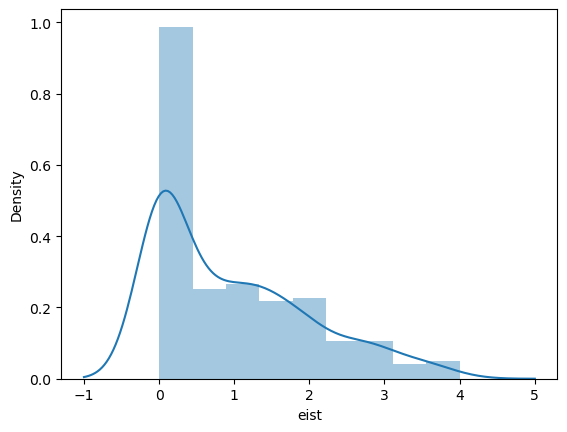

In [75]:
sns.distplot(heart['eist'])

## Dummy Conversion

In [76]:
heart_categorical=heart.select_dtypes('object')
heart_categorical.head()

,sex,pain,fbs,ecg,eiang,slope,vessels,thal
0,M,1.0,1.0,2.0,0.0,3.0,0.0,6.0
1,M,4.0,0.0,2.0,1.0,2.0,3.0,3.0
2,M,4.0,0.0,2.0,1.0,2.0,2.0,7.0
3,M,3.0,0.0,0.0,0.0,3.0,0.0,3.0
4,F,2.0,0.0,2.0,0.0,1.0,0.0,3.0


In [77]:
heart_numerical=heart.select_dtypes(['int64','float64'])
heart_numerical.head()

,age,BP,chol,maxhr,eist,diagnosis
0,63.0,145.0,233.0,150.0,2.3,0
1,67.0,160.0,286.0,108.0,1.5,1
2,67.0,120.0,229.0,129.0,2.6,1
3,37.0,130.0,250.0,187.0,3.5,0
4,41.0,130.0,204.0,172.0,1.4,0


In [78]:
dummy=pd.get_dummies(heart_categorical,drop_first=True)
dummy.head()

C:\Users\user\AppData\Local\Temp\ipykernel_7900\106548592.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummy=pd.get_dummies(heart_categorical,drop_first=True)


,sex_M,pain_2.0,pain_3.0,pain_4.0,fbs_1.0,ecg_1.0,ecg_2.0,eiang_1.0,slope_2.0,slope_3.0,vessels_1.0,vessels_2.0,vessels_3.0,thal_6.0,thal_7.0
0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0
1,1,0,0,1,0,0,1,1,1,0,0,0,1,0,0
2,1,0,0,1,0,0,1,1,1,0,0,1,0,0,1
3,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0


In [79]:
heart_final=pd.concat([dummy,heart_numerical],axis=1)
heart_final.head()

,sex_M,pain_2.0,pain_3.0,pain_4.0,fbs_1.0,ecg_1.0,ecg_2.0,eiang_1.0,slope_2.0,slope_3.0,...,vessels_2.0,vessels_3.0,thal_6.0,thal_7.0,age,BP,chol,maxhr,eist,diagnosis
0,1,0,0,0,1,0,1,0,0,1,...,0,0,1,0,63.0,145.0,233.0,150.0,2.3,0
1,1,0,0,1,0,0,1,1,1,0,...,0,1,0,0,67.0,160.0,286.0,108.0,1.5,1
2,1,0,0,1,0,0,1,1,1,0,...,1,0,0,1,67.0,120.0,229.0,129.0,2.6,1
3,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,37.0,130.0,250.0,187.0,3.5,0
4,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,41.0,130.0,204.0,172.0,1.4,0


In [80]:
x=heart_final.drop('diagnosis',axis=1)
y=heart['diagnosis']

In [81]:
print(x.shape)
print(y.shape)

(278, 20)
(278,)


## Create Training and testing samples

In [86]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [87]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(194, 20) (84, 20) (194,) (84,)


## Feature selection using chi-square test

In [94]:
#feature selection using chi-square test since the targeted variable is categorical 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

key_features=SelectKBest(score_func=f_classif,k=4)
#to select 4 significant variables

#fit the key_features to the training data and tranform it
xtrain_selected=key_features.fit_transform(x_train,y_train)

#get indices of the selected features
selected_indices=key_features.get_support(indices=True)

#get the names of the selected features
selected_features=x_train.columns[selected_indices]

In [95]:
selected_features

Index(['pain_4.0', 'thal_7.0', 'maxhr', 'eist'], dtype='object')

## Logistic Regression Algorithm

In [ ]:
#using all features

In [88]:
logreg=LogisticRegression()

In [89]:
logreg.fit(x_train,y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [96]:
logreg.score(x_train,y_train)

0.865979381443299

In [90]:
lr_predicted=logreg.predict(x_test)

In [97]:
logreg.score(x_test,y_test)

0.8333333333333334

In [98]:
#using selected features

In [99]:
xtrain=x_train[selected_features]

In [100]:
xtest=x_test[selected_features]

In [101]:
logreg.fit(xtrain,y_train)

LogisticRegression()

In [102]:
logreg.score(xtrain,y_train)

0.8144329896907216

In [103]:
lr_predicted=logreg.predict(xtest)

In [104]:
logreg.score(xtest,y_test)

0.7976190476190477

In [105]:
confusion_matrix(lr_predicted,y_test)

array([[43, 12],
       [ 5, 24]], dtype=int64)

In [106]:
#store logistic regression scores in seperate variables
lr_accuracy=accuracy_score(y_test, lr_predicted)
lr_precision=precision_score(y_test, lr_predicted)
lr_recall=recall_score(y_test, lr_predicted)
lr_fscore=f1_score(y_test, lr_predicted)

In [107]:
col=['Model','Accuracy',  'Precision','Recall', 'F1-Score']
data=[["Log Reg", lr_accuracy,lr_precision, lr_recall,lr_fscore]]
ml_summary=pd.DataFrame(data, columns=col)
ml_summary

,Model,Accuracy,Precision,Recall,F1-Score
0,Log Reg,0.797619,0.827586,0.666667,0.738462


## KNN (K-nearest neighbors) Algorithm

In [108]:
#import knn library from sklearn
from sklearn.neighbors import KNeighborsClassifier

In [110]:
#create model object
knn=KNeighborsClassifier(n_neighbors=5,metric='euclidean')

In [111]:
knn.fit(xtrain,y_train)

KNeighborsClassifier(metric='euclidean')

In [112]:
knn.score(xtrain,y_train)

0.7731958762886598

In [113]:
knn_predicted=knn.predict(xtest)

In [114]:
knn.score(xtest,y_test)

0.6904761904761905

In [115]:
#check scores
knn_accuracy=accuracy_score(y_test, knn_predicted)
knn_precision=precision_score(y_test, knn_predicted)
knn_recall=recall_score(y_test, knn_predicted)
knn_fscore=f1_score(y_test, knn_predicted)

In [116]:
#update accuracy tables
col=['Model','Accuracy',  'Precision','Recall', 'F1-Score']
data=[["Log Reg", lr_accuracy,lr_precision, lr_recall,lr_fscore],
     ["KNN", knn_accuracy,knn_precision, knn_recall,knn_fscore]]
ml_summary=pd.DataFrame(data, columns=col)
ml_summary

,Model,Accuracy,Precision,Recall,F1-Score
0,Log Reg,0.797619,0.827586,0.666667,0.738462
1,KNN,0.690476,0.750000,0.416667,0.535714


## Naive Bayes

In [117]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

In [118]:
#Create a Gaussian Classifier
gnb = GaussianNB()

In [119]:
gnb.fit(xtrain,y_train)

GaussianNB()

In [120]:
gnb.score(xtrain,y_train)

0.8092783505154639

In [122]:
gnb_predicted=gnb.predict(xtest)

In [123]:
gnb.score(xtest,y_test)

0.8214285714285714

In [124]:
gnb_accuracy=accuracy_score(gnb_predicted,y_test)
gnb_precision=precision_score(gnb_predicted,y_test)
gnb_recall=recall_score(gnb_predicted,y_test)
gnb_fscore=f1_score(gnb_predicted,y_test)

In [125]:
col=['Model','Accuracy','Precision','Recall','F1-score']
data=[["Log Reg", lr_accuracy,lr_precision, lr_recall,lr_fscore],
     ["KNN", knn_accuracy,knn_precision, knn_recall,knn_fscore],
     ['Naive Bayes',gnb_accuracy,gnb_precision,gnb_recall,gnb_fscore]]
ml_summary=pd.DataFrame(data, columns=col)
ml_summary

,Model,Accuracy,Precision,Recall,F1-score
0,Log Reg,0.797619,0.827586,0.666667,0.738462
1,KNN,0.690476,0.750000,0.416667,0.535714
2,Naive Bayes,0.821429,0.722222,0.838710,0.776119


## Decision Tree

In [126]:
from sklearn.tree import DecisionTreeClassifier

In [127]:
dtree=DecisionTreeClassifier(max_depth=5)

In [128]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [129]:
dtree.score(x_train,y_train)

0.9432989690721649

In [130]:
dtree_predicted=dtree.predict(x_test)

In [131]:
dtree.score(x_test,y_test)

0.7023809523809523

In [132]:
dtree_accuracy=accuracy_score(dtree_predicted,y_test)
dtree_precision=precision_score(dtree_predicted,y_test)
dtree_recall=recall_score(dtree_predicted,y_test)
dtree_fscore=f1_score(dtree_predicted,y_test)

In [133]:
col=['Model','Accuracy','Precision','Recall','F1-score']
data=[["Log Reg", lr_accuracy,lr_precision, lr_recall,lr_fscore],
     ["KNN", knn_accuracy,knn_precision, knn_recall,knn_fscore],
     ['Naive Bayes',gnb_accuracy,gnb_precision,gnb_recall,gnb_fscore],
     ['Decision Tree',dtree_accuracy,dtree_precision,dtree_recall,dtree_fscore]]
ml_summary=pd.DataFrame(data, columns=col)
ml_summary

,Model,Accuracy,Precision,Recall,F1-score
0,Log Reg,0.797619,0.827586,0.666667,0.738462
1,KNN,0.690476,0.750000,0.416667,0.535714
2,Naive Bayes,0.821429,0.722222,0.838710,0.776119
3,Decision Tree,0.702381,0.527778,0.703704,0.603175


## Random Forest

In [134]:
from sklearn.ensemble import RandomForestClassifier

In [135]:
rfc=RandomForestClassifier(n_estimators=100)

In [136]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [138]:
rfc_predicted=rfc.predict(x_test)

In [139]:
rfc_accuracy=accuracy_score(y_test,rfc_predicted)
rfc_precision=precision_score(y_test,rfc_predicted)
rfc_recall=recall_score(y_test,rfc_predicted)
rfc_fscore=f1_score(y_test,rfc_predicted)

In [140]:
col=['Model','Accuracy','Precision','Recall','F1-score']
data=[["Log Reg", lr_accuracy,lr_precision, lr_recall,lr_fscore],
     ["KNN", knn_accuracy,knn_precision, knn_recall,knn_fscore],
     ['Naive Bayes',gnb_accuracy,gnb_precision,gnb_recall,gnb_fscore],
     ['Decision Tree',dtree_accuracy,dtree_precision,dtree_recall,dtree_fscore],
     ['Random Forest',rfc_accuracy,rfc_precision,rfc_recall,rfc_fscore]]
ml_summary=pd.DataFrame(data, columns=col)
ml_summary

,Model,Accuracy,Precision,Recall,F1-score
0,Log Reg,0.797619,0.827586,0.666667,0.738462
1,KNN,0.690476,0.750000,0.416667,0.535714
2,Naive Bayes,0.821429,0.722222,0.838710,0.776119
3,Decision Tree,0.702381,0.527778,0.703704,0.603175
4,Random Forest,0.761905,0.785714,0.611111,0.687500


## SVM

In [141]:
from sklearn.svm import SVC

In [142]:
svm=SVC(kernel='linear')

In [143]:
svm.fit(xtrain,y_train)

SVC(kernel='linear')

In [145]:
svm_predicted=svm.predict(xtest)

In [146]:
svm_accuracy=accuracy_score(y_test,svm_predicted)
svm_precision=precision_score(y_test,svm_predicted)
svm_recall=recall_score(y_test,svm_predicted)
svm_fscore=f1_score(y_test,svm_predicted)

In [147]:
col=['Model','Accuracy','Precision','Recall','F1-score']
data=[["Log Reg", lr_accuracy,lr_precision, lr_recall,lr_fscore],
     ["KNN", knn_accuracy,knn_precision, knn_recall,knn_fscore],
     ['Naive Bayes',gnb_accuracy,gnb_precision,gnb_recall,gnb_fscore],
     ['Decision Tree',dtree_accuracy,dtree_precision,dtree_recall,dtree_fscore],
     ['Random Forest',rfc_accuracy,rfc_precision,rfc_recall,rfc_fscore],
     ['SVM',svm_accuracy,svm_precision,svm_recall,svm_fscore]]
ml_summary=pd.DataFrame(data, columns=col)
ml_summary

,Model,Accuracy,Precision,Recall,F1-score
0,Log Reg,0.797619,0.827586,0.666667,0.738462
1,KNN,0.690476,0.750000,0.416667,0.535714
2,Naive Bayes,0.821429,0.722222,0.838710,0.776119
3,Decision Tree,0.702381,0.527778,0.703704,0.603175
4,Random Forest,0.761905,0.785714,0.611111,0.687500
5,SVM,0.797619,0.851852,0.638889,0.730159
